In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

In [14]:
import json

path = '../code/NOSE_results_single_sample.json'
path = '../code/NOSE_results.json'

# DIffernces
# - addd 2 * x in hidden state
# - using the avarege of 10 samples

with open(path) as f:
    data = json.load(f)


te_matrix = np.zeros((len(data.keys()), 32))

for i, (key, value) in enumerate(data.items()):
    for j, (k, v) in enumerate(data[key]['transfer_entropy'].items()):
        te_matrix[i, int(k)] = v

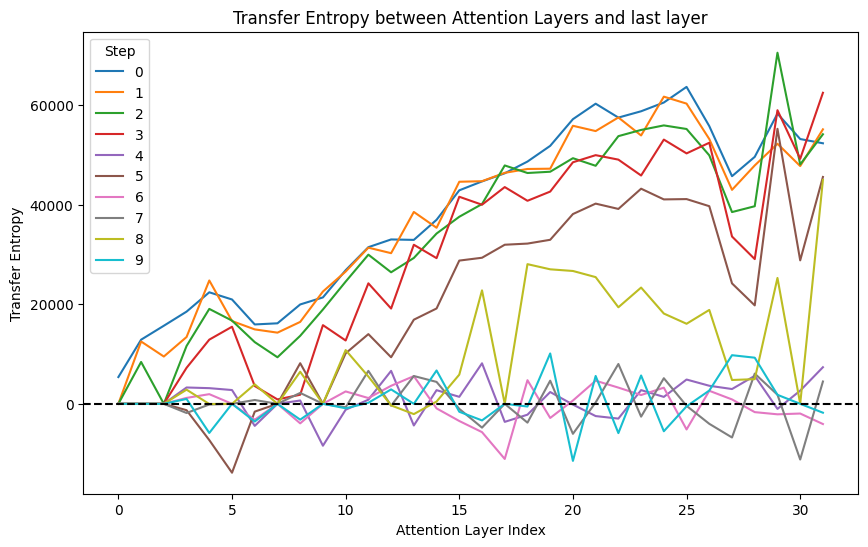

In [15]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=pd.DataFrame(te_matrix).T, dashes=False)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Attention Layer Index') 
plt.ylabel('Transfer Entropy')
plt.legend(title='Step')
plt.title('Transfer Entropy between Attention Layers and last layer')
plt.show()

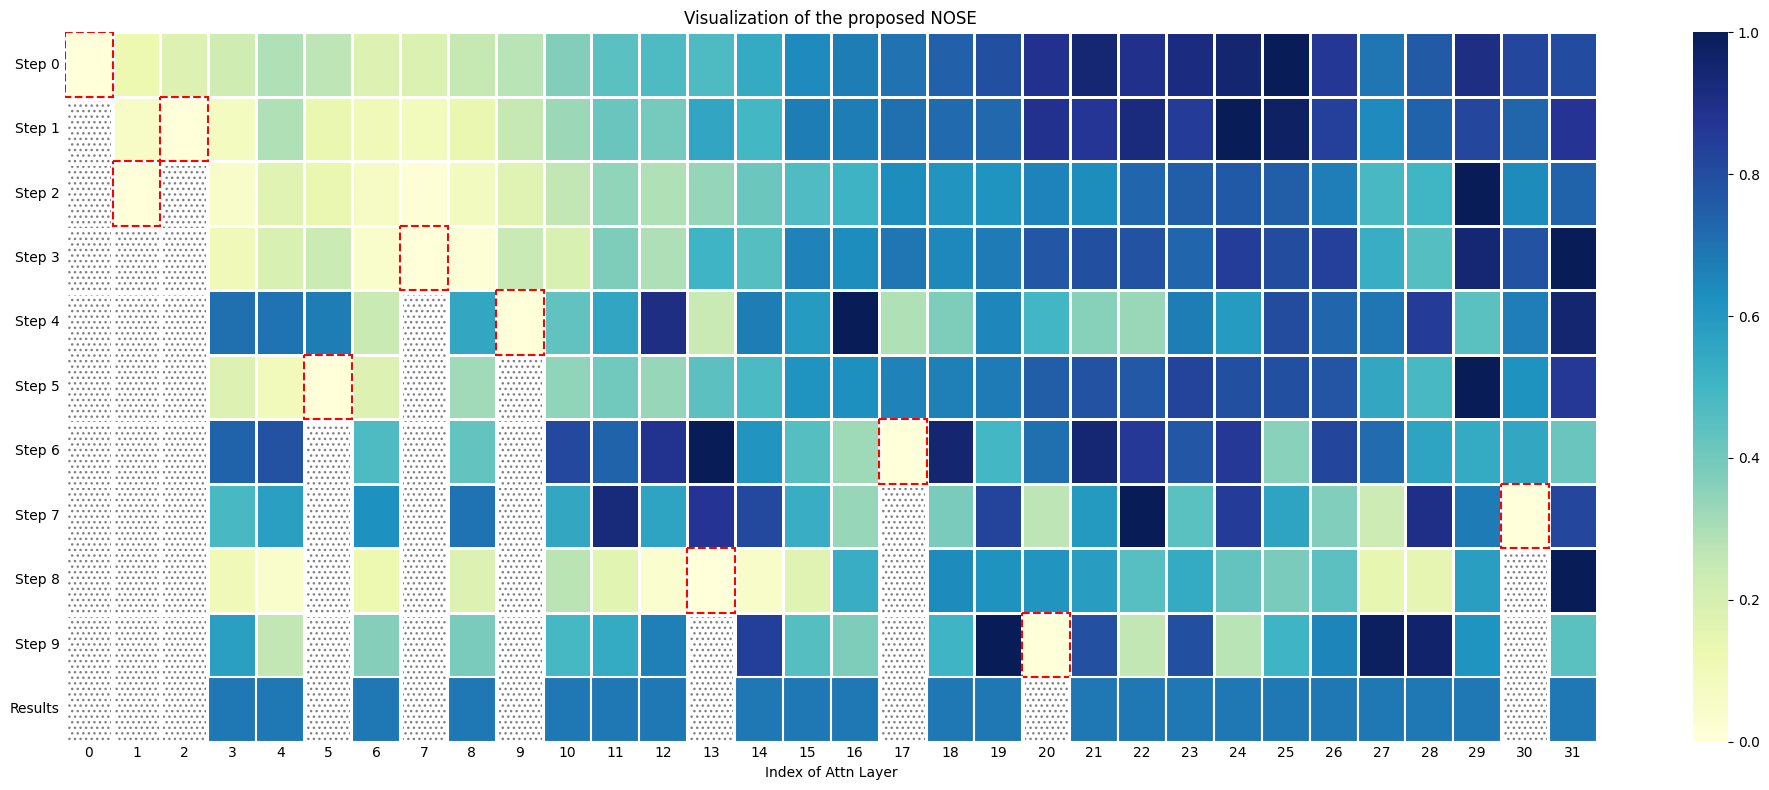

In [16]:
num_layers = 32
steps = list(data.keys())
columns = np.arange(num_layers)

matrix = np.zeros((len(steps), len(columns)))
results_line = np.zeros(num_layers)

for i, step in enumerate(steps):
    line = [data[step]['transfer_entropy'].get(str(col), np.nan) for col in columns]
    min_line, max_line = np.nanmin(line), np.nanmax(line)
    values = [(x - min_line) / (max_line - min_line) for x in line]
    matrix[i, :] = values

for i, value in enumerate(matrix[-1, :]):
    if np.isnan(value) or value == 0:
        results_line[i] = np.nan
    else:
        results_line[i] = 0


# Create the plot
plt.figure(figsize=(20, 8))

matrix = np.vstack((matrix, results_line))
labels = [f'Step {i}' for i in range(len(data.keys()))] + ['Results']


sns.heatmap(matrix, annot=False, cmap='YlGnBu', cbar=True, vmin=0, vmax=1, linewidths=1)
plt.yticks(np.arange(len(steps)+1)+0.5, labels=labels, rotation=0)
plt.tick_params(axis='both', which='both', length=0)
plt.title('Visualization of the proposed NOSE', fontsize=12)
plt.xlabel('Index of Attn Layer')
plt.tight_layout()

for x in range(matrix.shape[0]):
    for y in range(matrix.shape[1]):
        if matrix[x, y] == 0 and x != matrix.shape[0] - 1:
            plt.gca().add_patch(plt.Rectangle((y, x), 1, 1, fill=False, edgecolor='red', linestyle='--', linewidth=1.5))
        if np.isnan(matrix[x, y]):
            plt.gca().add_patch(plt.Rectangle((y+0.06, x+0.07), .9, .97, fill=False, hatch='...', edgecolor='grey', linestyle='-', linewidth=0))

for y in range(matrix.shape[1]):
    if matrix[-1, y] == 0:
        plt.gca().add_patch(plt.Rectangle((y, matrix.shape[0]-1), 1, 1, fill=True, edgecolor='white', linestyle='-', linewidth=1.5))

plt.show()
